#### Perceptron(Yapay nöron)
It takes inputs and gives an output.


#### Sigmoid funciton
It takes value between 0-1.
It used for classification problem generally.

#### Tanh(hiperbolik) function
It takes value between (-1,1). used for classification

#### Relu(rectified linear unit)
It takes value between (0,inf). 
It is generally used in deep learning.

#### Linear functions
It can take infinitly values but, beacuse of it is not nonlinear it could cause problems.

In [2]:
import pandas as pd


In [3]:
df = pd.read_excel("/Users/huseyinozdemir/Desktop/Ml-pre/Tensorflow/bisiklet_fiyatlari.xlsx")
df

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [4]:
import seaborn as sbn
import matplotlib.pyplot as plt

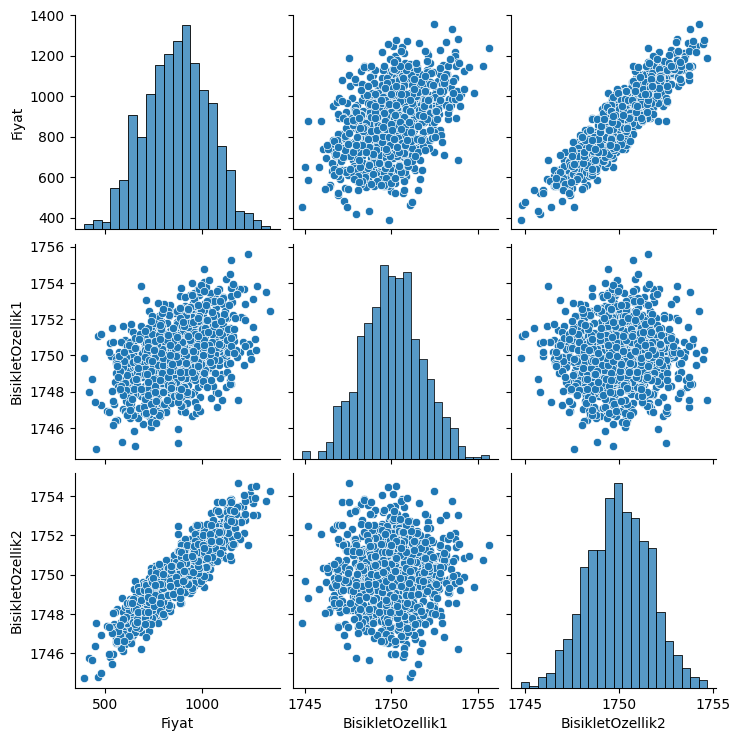

In [5]:
sbn.pairplot(df)

## Split data into two Test/Train

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
# y = wx + b
# y -> label
# x -> feature
y = df["Fiyat"].values
x = df[["BisikletOzellik1","BisikletOzellik2"]].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)



In [8]:
x_train

array([[1752.154403, 1747.614957],
       [1748.927091, 1749.736784],
       [1746.907002, 1751.789728],
       ...,
       [1750.829264, 1752.529499],
       [1748.009493, 1748.524087],
       [1750.974579, 1748.87023 ]])

## Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
 

In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(x_train)


MinMaxScaler()

In [12]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
x_test

array([[ 0.39533335,  0.38540674],
       [ 0.57300503,  0.74070922],
       [ 0.61294073,  0.65734262],
       [ 0.38169527,  0.73076306],
       [ 0.07776588,  0.46323646],
       [ 0.49421974,  0.68949256],
       [ 0.20657418,  0.70096245],
       [ 0.55141986,  0.41776772],
       [ 0.36812184,  0.69082392],
       [ 0.56465726,  0.38774652],
       [ 0.57048026,  0.7181082 ],
       [ 0.79569522,  0.47979896],
       [ 0.38488231,  0.4185652 ],
       [ 0.33142547,  0.42411974],
       [ 0.89361375,  0.63912768],
       [ 0.50191165,  0.39789172],
       [ 0.71598079,  0.43688382],
       [ 0.3581219 ,  0.92028226],
       [ 0.49989366,  0.85589308],
       [ 0.63965431,  0.59024782],
       [ 0.1905362 ,  0.34203635],
       [ 0.40982893,  0.45849202],
       [ 0.26844786,  0.40167268],
       [ 0.38649708,  0.33592761],
       [ 0.50654703,  0.65789836],
       [ 0.41260559,  0.79338073],
       [ 0.45631314,  0.61323306],
       [ 0.44064793,  0.40889311],
       [ 0.42963904,

In [14]:
x_train.shape

(670, 2)

In [15]:
import tensorflow as tf


2023-02-24 21:37:42.048838: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))

model.add(Dense(1))

model.compile(optimizer = "rmsprop",loss = "mse")

2023-02-24 21:38:15.509467: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.fit(x_train,y_train,epochs=250)


Epoch 1/250
21/21 [==============================] - 2s 3ms/step - loss: 784530.8125
Epoch 2/250
21/21 [==============================] - 0s 4ms/step - loss: 783907.1250
Epoch 3/250
21/21 [==============================] - 0s 5ms/step - loss: 783243.5625
Epoch 4/250
21/21 [==============================] - 0s 9ms/step - loss: 782487.1875
Epoch 5/250
21/21 [==============================] - 0s 4ms/step - loss: 781618.9375
Epoch 6/250
21/21 [==============================] - 0s 9ms/step - loss: 780623.2500
Epoch 7/250
21/21 [==============================] - 0s 5ms/step - loss: 779486.6250
Epoch 8/250
21/21 [==============================] - 0s 6ms/step - loss: 778202.1250
Epoch 9/250
21/21 [==============================] - 0s 4ms/step - loss: 776740.1250
Epoch 10/250
21/21 [==============================] - 0s 4ms/step - loss: 775089.3125
Epoch 11/250
21/21 [==============================] - 0s 4ms/step - loss: 773245.6250
Epoch 12/250
21/21 [==============================] - 0s 4ms/st

In [19]:
loss = model.history.history["loss"]



<AxesSubplot: >

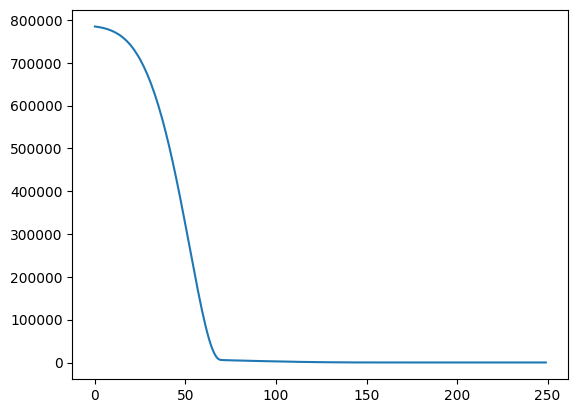

In [20]:
sbn.lineplot(x =range(len(loss)),y = loss)

In [21]:
train_loss =  model.evaluate(x_train, y_train, verbose=0)

In [24]:
test_loss = model.evaluate(x_test,y_test,verbose=0)
test_loss


84.80091857910156

In [25]:
train_loss

81.82696533203125

In [26]:
test_predicts = model.predict(x_test)

11/11 [==============================] - 0s 2ms/step


In [27]:
test_predicts

array([[ 711.99915],
       [1095.1992 ],
       [1040.0975 ],
       [1005.00397],
       [ 643.9062 ],
       [1017.2837 ],
       [ 904.53357],
       [ 806.567  ],
       [ 964.6576 ],
       [ 786.2365 ],
       [1074.5669 ],
       [ 964.4178 ],
       [ 736.23254],
       [ 718.2405 ],
       [1144.0378 ],
       [ 768.255  ],
       [ 893.2888 ],
       [1158.9327 ],
       [1163.6823 ],
       [ 993.43616],
       [ 587.1312 ],
       [ 781.4185 ],
       [ 671.9595 ],
       [ 665.4186 ],
       [ 995.2039 ],
       [1072.3667 ],
       [ 935.1334 ],
       [ 751.6465 ],
       [1151.1044 ],
       [ 727.51086],
       [ 777.6455 ],
       [ 852.1791 ],
       [ 770.17365],
       [1197.4906 ],
       [ 746.30615],
       [ 733.6842 ],
       [ 881.87897],
       [ 966.9304 ],
       [ 895.2333 ],
       [ 694.37854],
       [1086.5536 ],
       [ 731.9636 ],
       [1061.7166 ],
       [ 783.54315],
       [ 881.7796 ],
       [1021.97437],
       [1175.1743 ],
       [ 861.

In [28]:
predictDF = pd.DataFrame(y_test,columns=["Real Y"])


In [29]:
predictDF

,Real Y
0,704.018558
1,1092.273347
2,1019.296366
3,1012.530061
4,649.642181
...,...
325,937.201433
326,745.226389
327,645.610167
328,884.855797


In [31]:
test_predicts = pd.Series(test_predicts.reshape(330,))

In [32]:
test_predicts

0       711.999146
1      1095.199219
2      1040.097534
3      1005.003967
4       643.906189
          ...     
325     939.756958
326     761.421509
327     651.479004
328     876.450378
329     873.147766
Length: 330, dtype: float32

In [33]:
predictDF = pd.concat([predictDF,test_predicts],axis=1)

In [34]:
predictDF

,Real Y,0
0,704.018558,711.999146
1,1092.273347,1095.199219
2,1019.296366,1040.097534
3,1012.530061,1005.003967
4,649.642181,643.906189
...,...,...
325,937.201433,939.756958
326,745.226389,761.421509
327,645.610167,651.479004
328,884.855797,876.450378


In [35]:
predictDF.columns = ["Real Y", "Predict Y"]
predictDF

,Real Y,Predict Y
0,704.018558,711.999146
1,1092.273347,1095.199219
2,1019.296366,1040.097534
3,1012.530061,1005.003967
4,649.642181,643.906189
...,...,...
325,937.201433,939.756958
326,745.226389,761.421509
327,645.610167,651.479004
328,884.855797,876.450378


<AxesSubplot: xlabel='Real Y', ylabel='Predict Y'>

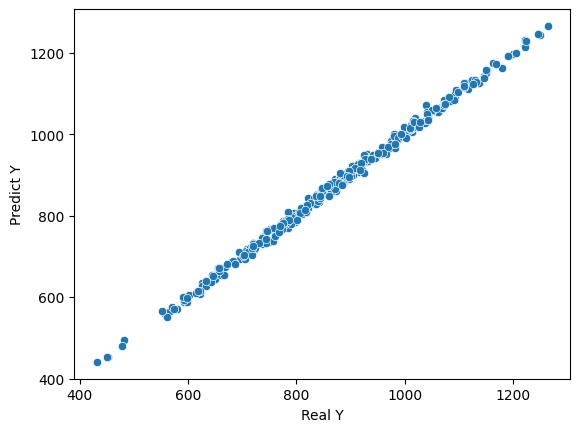

In [36]:
sbn.scatterplot(x="Real Y",y="Predict Y",data=predictDF)

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [38]:
mean_absolute_error(predictDF["Real Y"], predictDF["Predict Y"])


7.420480654940815

In [39]:
df.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [43]:
newBicFeat = [[1751, 1750]]
newBicFeat = scaler.transform(newBicFeat)
model.predict(newBicFeat)

1/1 [==============================] - 0s 62ms/step


array([[917.94556]], dtype=float32)

In [44]:
from tensorflow.keras.models import load_model

In [47]:
model.save("Biceyle_Model.h5")

In [48]:
calledAfterModel = load_model("Biceyle_Model.h5")

In [49]:
calledAfterModel.predict(newBicFeat)

1/1 [==============================] - 0s 120ms/step


array([[917.94556]], dtype=float32)